<a href="https://www.nvidia.com/dli"> <img src="images/DLI Header.png" alt="标题" style="width: 400px;"/> </a>

# 基于 Numba 的 CUDA Python 编程简介

**[CUDA](https://en.wikipedia.org/wiki/CUDA)** 计算平台可以让开发者在 NVIDIA GPU 上实现大规模并行计算，从而加速应用程序的执行，节省宝贵的时间资源。

**[Numba](http://numba.pydata.org/)** 是一款即时(JIT) Python 函数编译器，提供简洁的 API 用于加速 Python 函数运行。对希望使用 GPU 加速其应用又不想写 C/C++ 代码的同学而言，Numba 是个极具吸引力的选择，而对日常使用 NumPy 执行大量计算任务的开发者来说，Numba 更是不二之选。Numba 可用于加速 CPU 上运行的 Python 函数，同样也适用于在 NVIDIA GPU 进行应用加速。**本课程侧重讲解使用 Numba 在 GPU 上加速 Python 应用程序所需的基础技能。**

## 课程结构

本课程分为以下**三个**部分：

- _基于 Numba 的 CUDA Python 编程简介_
- _使用 Numba 在 Python 中编写自定义的 CUDA 核函数_
- _使用 Numba 实现 CUDA Python 的多维网格和共享内存_

每节均包含一项最终评估，成功完成该评估后，我们将为您授予该课程的能力证书。每节另包含高阶资料附录，感兴趣者可借此深入学习。

### 基于 Numba 的 CUDA Python 编程简介

在第一部分中，您将首先学习如何使用 Numba 编译 CPU 函数，并且了解 Numba 编译器内部的工作过程。然后，您将继续学习使用 GPU 加速逐元素运算的 NumPy 数组函数，以及在 CPU 和 GPU 间高效传输数据的技术。

在第一个部分结束后，您将能使用 GPU 对 NumPy 数组上的执行元素级运算的Python代码进行加速。

### 使用 Numba 在 Python 中编写自定义 CUDA 核函数

在第二部分中，您将进一步拓展能力，通过编写自定义 CUDA 核函数，实现在 GPU 上并行执行任意的而不仅仅是基于元素的计算密集型函数。为达成学习目标，您还需了解 NVIDIA GPU 如何并行执行代码，并学习几个基础的并行编程技巧，包括如何协调线程工作以及处理竞争条件(racing condition)。您还会学习在 GPU 上调试代码的技巧。

第二部分学习结束后，您将能使用 GPU 加速各类处理一维数据的计算密集型函数。

### 基于 Numba 控制 CUDA 的多维网格和共享内存

在第三部分中，您将开始并行处理二维数据，并将学习如何使用 GPU 上的称为共享内存的片上存储空间。

第三部分学习结束后，您将能使用 Numba 对一维和二维数据编写经 GPU 加速的 Python 代码。同时，您还可使用几种最为重要的优化策略，以编写稳定而快速的 GPU 程序。

## 课程预备知识

* 能够编写 Python程序，特别是会编写和调用函数，处理变量、循环、控制逻辑，导入和使用工具包。
* 熟悉 Python 的 NumPy库。如果您从未用过 NumPy 但熟悉 Python，那么您会发现在本课中使用的 NumPy 功能是简单且直观的。对于需要阐明的知识点，我们会提供注释和链接。
* 大致了解某些计算机科学的术语，如内存分配、数据类型、延迟和处理内核。
* 基本理解向量、矩阵和矩阵乘法的概念。

## 本节目标

完成本节内容的学习后，您将能够：

- 使用 Numba 编译运行在 CPU 上的 Python 函数。
- 了解 Numba 如何编译 Python 函数。
- 使用 GPU 加速 NumPy 通用函数 (ufunc)。
- 使用 GPU 加速自定义的数组处理函数。
- 优化 CPU 主机和 GPU 设备之间的数据传输。

## 什么是 Numba？

Numba 是一个**类型专用**的**即时函数编译器**，用于为 CPU 或 GPU 加速**以数值计算为主的** Python 函数。此定义很长，下面就让我们逐一解析这些术语：

* **函数编译器**：Numba 用于编译 Python 函数，而非整个应用程序，它也不是函数的一部分。Numba 不会取代 Python 解释器，而仅作为另一个 Python 模块，将普通函数转化为执行速度更快的函数（通常情况下）。
* **类型专用**：Numba 可为您当前使用的特定数据类型生成专门的执行代码，从而加速函数运行。Python函数被设计为对通用数据类型进行操作，这为其带来了极大的灵活性，但也严重拖慢了运行速度。实际上，您只会调用具有少量参数类型的函数，因此Numba会为每种类型的集合生成快速实现。
* **即时**：在函数首次被调用时，Numba 会对它们进行转换，这样可以确保编译器知道您将使用的参数类型。这也使得Numba可以像传统应用程序一样轻松地在Jupyter笔记本中交互使用。
* **以数字计算为主**：Numba 目前以处理数值型数据类型为主，如 `int`、`float` 和 `complex`。字符串处理支持极为受限，且许多字符串处理函数还无法在 GPU 上获得有效加速。若要借助 Numba 获得最佳加速效果，您可能需要搭配使用 NumPy 数组。

## Numba 使用要求

Numba 支持各类操作系统：

* Windows 7 及以上版本，32 和 64 位
* macOS 10.9 及以上版本，64 位
* Linux（RHEL 5 及以上的大多数版本），32 和 64 位

Numba 还支持多种 Python 版本：

* Python 2.7、3.4 至 3.6 版本
* NumPy 1.10 及以上版本

此外，其还支持各类硬件：

* x86、x86_64 及 AMD64 CPU
* NVIDIA CUDA GPU（计算能力 3.0 及更高级别，CUDA 8.0 及以上版本）
* AMD GPU（实验性补丁）
* ARM（实验性补丁）

本课程将使用 Linux 64 位和 CUDA 9 版本。

## 注解：CUDA C/C++、Numba 与 PyCUDA 对比

Numba 绝非 CUDA 编程的唯一手段。目前，最常见的 CUDA 编程方法便是使用 CUDA C/C++ 语言扩展程序。对于 Python 而言，[PyCUDA](https://documen.tician.de/pycuda/) 是除 Numba 以外可实现 GPU 加速 Python 代码的另一种选择。本课程将着重介绍 Numba。不过作为背景知识，我们也有必要在开讲前简单对比一下刚刚提到的三个选项。

**CUDA C/C++**：
- 最常用、高效且最灵活的方式来使用 CUDA
- 加速 C/C++ 应用程序

**PyCUDA**：
- 完全对接 CUDA C/C++ API
- 在 Python 中释放 NVIDIA GPU 性能的优先选项
- 需在编写 C 代码，通常还要修改 Python 代码

**Numba**：
- 性能或许低于 PyCUDA
- （当前）并未完全支持 CUDA C/C++ API
- 仍能大幅加速应用程序，代码修改量小
- 开发者可在 Python 框架下轻松编写代码
- 能同时为 CPU 优化 Python 代码

## 第一步：编译CPU函数

之前的课程中介绍过，Numba 可用于为 CPU 或 GPU 优化代码。在介绍 GPU 加速之前，我们首先编写第一个函数，然后为 **CPU** 编译该函数。如此一来，我们在学习 Numba 语法时便会更容易，而且稍后还可让我们有机会比较 CPU 优化的 Numba 代码与 GPU 加速的 Numba 代码的性能表现。

通常，在对 Python 函数应用 [**函数装饰器**](https://en.wikipedia.org/wiki/Python_syntax_and_semantics#Decorators) 后，便可启用 Numba 编译器。装饰器即为函数修改器，使用十分简单的语法来转换所装饰的 Python 函数。我们将在此使用 Numba 的 CPU 编译装饰器 `@jit`：

In [ ]:
from numba import jit
import math

# This is the function decorator syntax and is equivalent to `hypot = jit(hypot)`.
# The Numba compiler is just a function you can call whenever you want!
@jit
def hypot(x, y):
    # Implementation from https://en.wikipedia.org/wiki/Hypot
    x = abs(x);
    y = abs(y);
    t = min(x, y);
    x = max(x, y);
    t = t / x;
    return x * math.sqrt(1+t*t)

让我们尝试执行上面定义的求直角三角形斜边的运算：

In [ ]:
hypot(3.0, 4.0)

下面我们将详细介绍调用 `hypot` 将会发生的具体过程，首先您要明确一点：初次调用 `hypot` 将会触发编译器，促使其编译函数代码。Numba 还会将函数的原始 Python 实现保存在 `.py_func` 属性中，以便我们能够调用原始 Python 代码，确保结果一致：

In [ ]:
hypot.py_func(3.0, 4.0)

### 基准测试

评测代码的性能是使用 Numba 的重要一环。下面让我们检测一下是否真正实现了加速。在 Jupyter Notebook（如本课程所用的笔记本）中执行此检测的最简单方法便是使用 [`%timeit`魔术函数](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit)。让我们先来测试一下原始 Python 的速度：

In [ ]:
%timeit hypot.py_func(3.0, 4.0)

`%timeit` 魔术函数会多次运行该语句以准确估算运行时间。默认情况下，它会返回最佳时间，这有助于降低随机背景事件影响测量的几率。三选一的方法确保首次运行的编译时间不会被计算在程序运行时间内：

In [ ]:
%timeit hypot(3.0, 4.0)

Numba 对该函数加速效果良好，运行明显快于纯 Python 代码的实现。当然，`hypot` 函数已经存在于 Python 自带模块中，下面让我们进一步对比结果：

In [ ]:
%timeit math.hypot(3.0, 4.0)

Python 的内置函数甚至比 Numba 还快！这是因为 Numba 会为每次函数调用带来额外开销，这将超出 Python 自身函数调用的时间。即便是极快速的函数（如以上函数），也会受此影响。（附注：若您从一个 Numba 函数中调用另一个 Numba 函数，则调用开销会很小；若编译器将函数内联至另一个函数，调用开销甚至可忽略不计。简言之，请始终对您的函数执行基准测试，以检查加速效果。）

### 练习：使用 Numba 为 CPU 编译函数

以下函数使用 [蒙特卡罗法确定圆周率](https://academo.org/demos/estimating-pi-monte-carlo/)（源代码来自 [Numba 主页](http://numba.pydata.org/)）。其正确性已有理论保证，无需担心具体的数学问题。

请先完成两项 `TODO` 以使用 Numba 编译 `monte_carlo_pi`函数，然后再执行下方的 3 个代码单元，以完成以下任务：

1. 确认编译版与未编译版运行结果一致。
2. 对未编译版执行基准测试。
3. 对编译版执行基准测试。

如您遇到问题，请参阅 [此解决方案](../edit/solutions/monte_carlo_pi_solution.py)。

In [ ]:
nsamples = 1000000

In [ ]:
# TODO: Import Numba's just-in-time compiler function
import random

# TODO: Use the Numba compiler to compile this function
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x**2 + y**2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

In [ ]:
# We will use numpy's `testing` library to confirm compiled and uncompiled versions run the same
from numpy import testing

# This assertion will fail until you successfully complete the exercise one cell above
testing.assert_almost_equal(monte_carlo_pi(nsamples), monte_carlo_pi.py_func(nsamples), decimal=2)

In [ ]:
%timeit monte_carlo_pi(nsamples)

In [ ]:
%timeit monte_carlo_pi.py_func(nsamples)

## Numba 工作原理

现在，您已初步了解如何使用 Numba 编译器，下面我们来看一下其背后的工作原理。首次调用 Numba 包装的 `hypot` 函数时，将启动以下流程：

![Numba 流程图](images/numba_flowchart.png "编译流程")

使用 `.inspect_types()` 方法可得出类型推理结果，这将打印出源代码的注释版本：

In [ ]:
hypot.inspect_types()

注意，Numba 的类型名称往往与 [NumPy 类型名称](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html) 一致，因此 Python `float` 通常亦为 `float64`（又可称为“双精度”）。查看数据类型有时对于 GPU 代码相当重要，因为 `float32` 和 `float64` 的计算性能在 NVIDIA GPU 设备上相差甚远。若您的算法可以使用 `float32` 获取正确结果，那您就应使用该数据类型，因为转换至 `float64` 可能会显著降低函数速度。

## object 和 nopython 模式

Numba 无法编译所有的 Python 代码。一方面，某些函数不具有 Numba 编译支持；另一方面，一些 Python 的数据类型（目前）无法高效编译。例如，Numba 不支持字典类型（至本课程编写时）。现在，我们尝试编译一串 Numba 尚无法编译的 Python 代码：

In [ ]:
@jit
def cannot_compile(x):
    return x['key']

cannot_compile(dict(key='value'))

您可能很惊讶以上单元在执行期间未产生任何问题。这是因为，在默认情况下，Numba 会返回至 **object 模式**，而该模式不执行数据类型的专用化。object 模式旨在实现其他的 Numba 功能，但在许多情形下，您都需要从 Numba 获知它对数据类型的推理是否成功。您也可将 `nopython` 参数传递至装饰器，以强制进入 **nopython 模式**（另一种编译模式）：

In [ ]:
@jit(nopython=True)
def cannot_compile(x):
    return x['key']

cannot_compile(dict(key='value'))

Numba 尝试编译函数时出现异常，在向下滚动至异常输出底部后，您将看到错误信息，其中会描述所发生的基本问题：
```
- argument 0: cannot determine Numba type of <class 'dict'>
```

**建议您选择 `nopython` 模式作为使用 `jit` 的最佳方法，因为这会为您带来更好的性能。**

Numba 还会提供另一个装饰器 `njit`（`jit(nopython=True)` 的别名）：

In [ ]:
from numba import njit

@njit
def cannot_compile(x):
    return x['key']

cannot_compile(dict(key='value'))

请参阅 [Numba 文件](https://numba.pydata.org/numba-doc/dev/reference/pysupported.html)，以获取 Numba 所支持的 Python 特性的详细信息。

## 适用于 GPU 的 Numba 及 NumPy 通用函数 (ufunc) 简介

下面我们会开始讲解 Numba 中的 GPU 编程，以及如何为 GPU 编译 [NumPy 通用函数 \(ufunc\)](https://docs.scipy.org/doc/numpy-1.15.1/reference/ufuncs.html)。

开始学习之前，我们首先要明确 GPU 编程最重要的一点：GPU 硬件专为*数据并行*而设计。如要实现最大吞吐，GPU 需要同时对许多不同元素执行相同运算。

NumPy 通用函数可对 NumPy 数组中的每个元素执行相同运算，本身就具备数据并行性，因此非常适于 GPU 编程。

## 回顾 NumPy 通用函数 (ufunc) 

熟悉 NumPy 通用函数 (ufunc) 是本课程的先决条件。若您尚不熟悉该主题，或已遗忘所学内容，这里有一个非常简短的介绍。若阅读完本简介后，您感觉自己仍无法掌握对 NumPy 数组的使用和了解通用函数的基础机制，建议您抽出约 1 小时时间来学习 [NumPy 快速入门教程](https://docs.scipy.org/doc/numpy/user/quickstart.html)。

NumPy 通用函数（“ufunc”）的概念是，此类函数可对相同或不同维度的 NumPy 数组或标量，进行逐元素的处理。

作为示例，我们将使用 NumPy `add` ufunc 演示 ufunc 的基础机制：

In [8]:
import numpy as np

a = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])

np.add(a, b) # Returns a new NumPy array resulting from adding every element in `a` to every element in `b`

array([11, 22, 33, 44])

ufunc 还可将标量与数组相结合：

In [ ]:
np.add(a, 100) # Returns a new NumPy array resulting from adding 100 to every element in `a`

对于维度不同但互相兼容的数组，我们还可通过名为 [*广播*](https://docs.scipy.org/doc/numpy-1.15.0/user/basics.broadcasting.html) 的技巧将其组合在一起。此方法会将低维数组复制多份，以匹配高维数组的维度。如有需要，请参阅 [`numpy.arange`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html) 和 [`numpy.ndarray.reshape`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.reshape.html) 文档，本课程亦会多次用到这两种功能：

In [11]:
c = np.arange(4*4).reshape((4,4))
print('c:', c)

np.add(b, c)

c: [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[10, 21, 32, 43],
       [14, 25, 36, 47],
       [18, 29, 40, 51],
       [22, 33, 44, 55]])

## 为 GPU 创建 ufunc

Numba 能够创建*经过编译的* ufunc，其过程涉及C代码，并不那么简单直观。借助 Numba，您只需实现一个对所有输入都执行的标量函数，并使用 `@vectorize` 装饰该函数。之后 Numba 便能确定出广播规则。若您熟悉 [NumPy 的 `vectorize`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.vectorize.html)，那么肯定也能轻松掌握 Numba 的 `vectorize` 装饰器。

在第一个示例中，我们将使用 `@vectorize` 装饰器为 **CPU** 编译和优化 ufunc。

In [4]:
from numba import vectorize
import numpy as np
@vectorize
def add_ten(num):
    return num + 10 # This scalar operation will be performed on each element

In [5]:
nums = np.arange(10)
add_ten(nums) # pass the whole array into the ufunc, it performs the operation on each element

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

我们将生成可在 GPU 上执行的 ufunc，它需要额外提供**显式类型签名**并设置 `target` 属性。类型签名用于描述ufuncs的参数和返回值使用的是哪种数据类型：
```python
'return_value_type(argument1_value_type, argument2_value_type, ...)'
```

请参阅 Numba 文档，获取有关 [可用的数据类型](https://numba.pydata.org/numba-doc/dev/reference/types.html) 及 [使用多个签名编写 ufunc](https://numba.pydata.org/numba-doc/dev/user/vectorize.html) 的更多信息。

下面是一个简单的示例，展示了为支持 CUDA 的 GPU 设备而编译的 ufunc。该函数需要两个 `int64` 值做为参数，并会同样返回一个 `int64` 值：

In [6]:
@vectorize(['int64(int64, int64)'], target='cuda') # Type signature and target are required for the GPU
def add_ufunc(x, y):
    return x + y

In [9]:
add_ufunc(a, b)

array([11, 22, 33, 44])

虽然此次函数调用非常简单，但期间执行了多项操作！Numba 刚才已自动完成以下操作：

* 已编译 CUDA 核函数，从而对所有输入元素并行执行 ufunc 运算。
* 已为输入和输出分配 GPU 显存。
* 已向 GPU 传入输入数据。
* 根据给定的输入大小，已使用正确的核函数维度执行 CUDA 核函数（GPU 函数）。
* 已将结果从 GPU 复制回 CPU。
* 已将结果返回为主机上的 NumPy 数组。
 
相较 C 语言的实现，以上 ufunc 的实现更为简洁。

您可能想知道这一简单示例在 GPU 上的执行速度有多快。下面就让我们一探究竟：

In [12]:
%timeit np.add(b, c)   # NumPy on CPU

1.18 µs ± 1.24 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [13]:
%timeit add_ufunc(b, c) # Numba on GPU

683 µs ± 377 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


GPU 竟比 CPU *慢这么多*？？目前来说，这是正常现象。因为在本示例中，我们（故意）误用了 GPU，以帮助阐明哪些问题适用于 GPU 计算，而哪些最好由 CPU 执行：

* **输入过小**：GPU 以并行方式实现高性能，可同时处理数千个值。我们的测试输入只分别采用了 4 和 16 个整数。只有大幅扩展数组规模，才能让 GPU 充分发挥作用。
* **计算过于简单**：与调用 CPU 上的函数相比，到 GPU 上执行运算任务的额外开销很大。若计算过程不涉及大量数学运算（通常称为“计算密集型任务”），GPU 将耗费大部分时间等待数据传输完成。
* **在 GPU 上来回复制数据**：某些情况下，对于单个函数而言，您可能值得耗费成本在 GPU 与 CPU 间来回复制数据，但我们更建议您对同一份数据运行多个 GPU 运算。针对此类情况，若将数据发送至 GPU，然后保留数据至所有计算结束，也不失为合理做法。
* **数据类型大于实际所需**：本示例使用 `int64`，但我们无需这样做。使用 32 和 64 位数据类型的代码在 CPU 上的运行速度基本相同，整数类型在此方面的差异可能也不明显，但 64 位浮点数据类型却能为 GPU 带来巨大的性能消耗。相比 32 位浮点数，64 位浮点数的运算速度可能要慢 2 倍（基于 Pascal 架构的 Tesla）至 24 倍（基于 Maxwell 架构的 GeForce）不等。NumPy 在创建数组时默认使用 64 位数据类型，因此请务必按需设置 [`dtype`](https://docs.scipy.org/doc/numpy-1.14.0/reference/arrays.dtypes.html) 属性，或使用 [`ndarray.astype()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.astype.html) 方法来指定使用 32 位数据类型。
  
  
根据以上内容，我们来尝试一个在 GPU 上运行更快的示例。该示例将使用 32 位数据类型和更大的输入规模，并将以更高强度执行运算：

In [15]:
import math # Note that for the CUDA target, we need to use the scalar functions from the math module, not NumPy

SQRT_2PI = np.float32((2*math.pi)**0.5)  # Precompute this constant as a float32.  Numba will inline it at compile time.

@vectorize(['float32(float32, float32, float32)'], target='cuda')
def gaussian_pdf(x, mean, sigma):
    '''Compute the value of a Gaussian probability density function at x with given mean and sigma.'''
    return math.exp(-0.5 * ((x - mean) / sigma)**2) / (sigma * SQRT_2PI)

In [16]:
import numpy as np
# Evaluate the Gaussian a million times!
x = np.random.uniform(-3, 3, size=1000000).astype(np.float32)
mean = np.float32(0.0)
sigma = np.float32(1.0)

# Quick test on a single element just to make sure it works
gaussian_pdf(x[0], 0.0, 1.0)

array([0.10136691], dtype=float32)

In [17]:
import scipy.stats # for definition of gaussian distribution, so we can compare CPU to GPU time
norm_pdf = scipy.stats.norm
%timeit norm_pdf.pdf(x, loc=mean, scale=sigma)

66.1 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%timeit gaussian_pdf(x, mean, sigma)

4.41 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


尽管在 GPU 上来回复制数据时增加了额外开销，但此示例依旧取得了显著的速度提升。对大型数据集使用特殊函数（`exp`、`sin` 和 `cos` 等）的 ufunc 尤其适合在 GPU 上运行。

做为最后的对比，让我们就 Numba 专为 **CPU** 优化的 `gaussian_pdf` 函数作出定义并计时：

In [19]:
@vectorize
def cpu_gaussian_pdf(x, mean, sigma):
    '''Compute the value of a Gaussian probability density function at x with given mean and sigma.'''
    return math.exp(-0.5 * ((x - mean) / sigma)**2) / (sigma * SQRT_2PI)

In [20]:
%timeit cpu_gaussian_pdf(x, mean, sigma)

22.7 ms ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


以上运行速度大大优于未编译的 CPU 版本，但又远低于 GPU 加速版本。

## CUDA 设备函数

ufunc 非常适合执行元素级的运算，这一任务也十分普遍。然而，许多函数并非如此。如要为 GPU 编译的函数**并非是**元素级的向量化函数，我们可以使用 `numba.cuda.jit`。在本课程下一节内容中，我们将深入学习 `numba.cuda.jit`，但现在让我们演示一下如何使用它来装饰辅助函数，以供GPU加速的ufunc使用，这样您就不需要将所有逻辑都塞入单个ufunc的定义中了。

注意，下方的 `polar_to_cartesian` 无需使用类型签名，此外它还传递两个标量值，这与我们所使用的向量化的 ufunc（类似于下方的 `polar_distance`）不同，因为后者需将 NumPy 数组用作参数。

`device=True` 参数表示装饰后的函数**仅**可从在 GPU 上运行的函数所调用，而无法从 CPU 主机代码调用：

In [21]:
from numba import cuda

@cuda.jit(device=True)
def polar_to_cartesian(rho, theta):
    x = rho * math.cos(theta)
    y = rho * math.sin(theta)
    return x, y

@vectorize(['float32(float32, float32, float32, float32)'], target='cuda')
def polar_distance(rho1, theta1, rho2, theta2):
    x1, y1 = polar_to_cartesian(rho1, theta1) # We can use device functions inside our GPU ufuncs
    x2, y2 = polar_to_cartesian(rho2, theta2)
    
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

In [22]:
n = 1000000
rho1 = np.random.uniform(0.5, 1.5, size=n).astype(np.float32)
theta1 = np.random.uniform(-np.pi, np.pi, size=n).astype(np.float32)
rho2 = np.random.uniform(0.5, 1.5, size=n).astype(np.float32)
theta2 = np.random.uniform(-np.pi, np.pi, size=n).astype(np.float32)

In [23]:
polar_distance(rho1, theta1, rho2, theta2)

array([1.1880288, 0.9285161, 1.7211506, ..., 2.1301568, 1.3535436,
       0.9265489], dtype=float32)

请注意，CUDA 编译器将主动内联(inline)设备函数，因此函数调用通常不会产生任何额外开销。同样，`polar_to_cartesian` 返回的“元组”（tuple类型）实际上并不是作为 Python 对象而创建的，而是临时表示为结构体（struct类型），然后由编译器对其进行优化。

## GPU 所支持的 Python

Numba 在 CPU 上受到限制无法编译所有函数，GPU 上同样如此。GPU 所支持的 Python 操作包括：

* `if`/`elif`/`else`
* `while` 和 `for` 循环
* 基础数学运算符
* 选自 `math` 和 `cmath` 模块的函数
* 元组

详情请参阅 [Numba 手册](http://numba.pydata.org/numba-doc/latest/cuda/cudapysupported.html)。

### 练习：使用 GPU 加速函数

我们来使用 GPU 加速“零抑制”函数。这是处理波形的一个常见运算：将所有低于某绝对量的样本值强制设为零，从而消除低振幅噪音。下面就让我们创建一些样本数据：

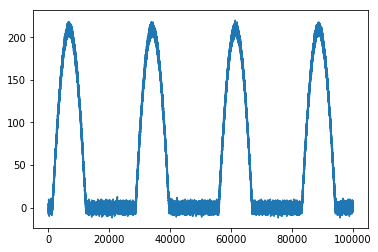

In [24]:
# This allows us to plot right here in the notebook
%matplotlib inline

# Hacking up a noisy pulse train
from matplotlib import pyplot as plt

n = 100000
noise = np.random.normal(size=n) * 3
pulses = np.maximum(np.sin(np.arange(n) / (n / 23)) - 0.3, 0.0)
waveform = ((pulses * 300) + noise).astype(np.int16)
plt.plot(waveform)

现在装饰此 `zero_suppress` 函数，使其在 CUDA 设备上作为向量化 ufunc 运行。如您遇到问题，请参阅 [此解决方案](../edit/solutions/zero_suppress_solution.py)。

In [27]:
@vectorize(['int16(int16, int16)'], target='cuda')
def zero_suppress(waveform_value, threshold):
    if waveform_value < threshold:
        result = 0
    else:
        result = waveform_value
    return result

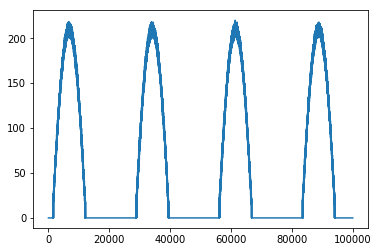

In [28]:
# This will throw an error until you successfully vectorize the `zero_suppress` function above.
# The noise on the baseline should disappear when zero_suppress is implemented
plt.plot(zero_suppress(waveform, 15))

## 管理 GPU 显存

到目前为止，我们一直将 CPU 上的 NumPy 数组用作 GPU 函数的输入和输出。为方便起见，Numba 已经自动将这些数据传输至 GPU，以便由 GPU 处理。通过这种隐式数据传输，Numba采取保守的行动，将在处理后自动将数据传输回CPU。可以想象，这是一个非常耗时的操作。

[CUDA 最佳实践指南](https://docs.nvidia.com/cuda/cuda-c-best-practices-guide/index.html) 中指出：

> **高优先级**：尽量减少 CPU(Host) 和 GPU(Device) 间的数据传输，即便与 CPU 相比，在设备上运行某些核函数并未实现性能提升时，也需遵照此规则。

秉持这一点，我们应思考如何避免将数据自动传输回主机，以降低开销。我们同时要确保仅在准备就绪时，将数据及时复制回主机。

为此，我们需创建 **CUDA 设备数组**，并将其传递至 GPU 函数。设备数组经过处理后不会自动传输回主机，因此您可根据需要在设备上重复使用这些数组，并只在操作至最后一步时，再将全部或部分数组发送回主机。

为进行演示，我们再次创建加法 ufunc 示例：

In [29]:
@vectorize(['float32(float32, float32)'], target='cuda')
def add_ufunc(x, y):
    return x + y

In [30]:
n = 100000
x = np.arange(n).astype(np.float32)
y = 2 * x

In [31]:
%timeit add_ufunc(x, y)  # Baseline performance with host arrays

1.14 ms ± 4.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


在 `numba.cuda` 模块中，有类函数可以将主机数据复制到 GPU，然后返回 CUDA 设备数组。注意，下面我们会尝试打印设备数组的内容，但我们只能获取数组信息，而无法获取其实际所含内容。这是因为数据目前位于设备上，我们需将其传输回主机才能打印相应值（稍后我们会对此进行讲解）：

In [32]:
from numba import cuda

x_device = cuda.to_device(x)
y_device = cuda.to_device(y)

print(x_device)
print(x_device.shape)
print(x_device.dtype)

(100000,)
float32


与 NumPy 数组类似，设备数组也可传递至 CUDA 函数，但在复制时不会产生任何额外开销：

In [33]:
%timeit add_ufunc(x_device, y_device)

556 µs ± 567 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


由于 `x_device` 和 `y_device` 已存在于设备上，因此该基准测试会更快完成。

不过，我们仍得为 ufunc 的输出分配设备数组，然后将该设备数组复制回主机，即使我们并未在以上单元中将该数组分配给一个变量。如要避免这一点，我们可以使用 [`numba.cuda.device_array()`](https://numba.pydata.org/numba-doc/dev/cuda-reference/memory.html#numba.cuda.device_array) 函数创建输出数组：

In [34]:
out_device = cuda.device_array(shape=(n,), dtype=np.float32)  # does not initialize the contents, like np.empty()

然后，我们可以在 ufunc 中使用特殊的 `out` 关键词参数，以指定输出缓存：

In [35]:
%timeit add_ufunc(x_device, y_device, out=out_device)

446 µs ± 693 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


此次调用 `add_ufunc` 并不需要在主机和设备之间进行任何数据传输，因而运行速度最快。如要将设备数组传输回主机内存，我们可以使用 `copy_to_host()` 方法：

In [36]:
out_host = out_device.copy_to_host()
print(out_host[:10])

[ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27.]


您可能会认为，此处比较的对象类型并不相同，因为在使用设备数组时，我们并未对 `to_device` 调用执行基准测试；但在使用主机数组 `a` 和 `b` 时，隐式数据传输会被纳入基准测试。事实的确如此。当然，正如之前所述，`add_func` 函数并非特别适用于 GPU，以上示例只是为说明如何消除传输需求。

如要确定是否应向 GPU 传输数据，请务必对您的数据传输执行基准测试。

此外，Numba 还提供其他方法来管理设备内存和数据传输，详情请参阅 [此文档](https://numba.pydata.org/numba-doc/dev/cuda/memory.html)。

### 练习：优化内存传输

给定以下 ufunc：

In [43]:
import math
from numba import cuda

@vectorize(['float32(float32, float32, float32)'], target='cuda')
def make_pulses(i, period, amplitude):
    return max(math.sin(i / period) - 0.3, 0.0) * amplitude


@vectorize(['float32(float32, float32)'], target='cuda')
def add_ufunc(x, y):
    return x + y

n = 100000
noise = (np.random.normal(size=n) * 3).astype(np.float32)
t = np.arange(n, dtype=np.float32)
period = n / 23

d_noise=cuda.to_device(noise)
d_t=cuda.to_device(t)
# 仅numpy需要cuda to_device,标量不需要 
d_pulses=cuda.device_array(shape=(n,), dtype=np.float32)

如下方单元所示，在调用 `make_pulses` 和 `add_ufunc` 期间，将数据传回主机并再次传回设备是一场无谓的数据往返之旅。

更新下方单元以使用设备内存分配功能，确保在调用 `make_pulses` 前仅会在设备中复制一次数据，且在调用 `add_ufunc` 后亦仅需在主机中复制一次。如您遇到问题，请参阅 [此解决方案](../edit/solutions/make_pulses_solution.py)。

In [47]:
make_pulses(t, period, 100.0,out=d_pulses) #out关键词参数 将保留结果在GPU上
waveform = add_ufunc(d_pulses, d_noise) # = 将自动把结果传回CPU

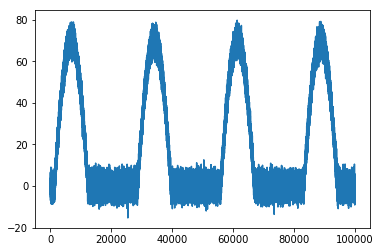

In [48]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(waveform)

## 评估

下面的练习将用到您目前所学的全部知识。不同于之前的练习，本次练习不提供任何解决方案代码。就像本节一样，本课程中的其它2个部分的notebook里也有需要评估的问题。成功完成全部课程的评估问题后，您将获得本课程的**“能力证书”**。

**请仔细阅读说明后再开始工作，确保以最大几率成功完成本次评估。**

### 加速神经网络计算

下例简单演示了在神经网络中创建隐藏层所需执行的部分工作。该示例对一百万个灰度值（此处随机创建）执行归一化，为其赋予权重，然后应用激活函数对其作出处理。

您要完成的任务是：运用所学技巧将此工作移至 GPU，确保正确执行计算，并提升函数调用性能。

开始任务之前，请注意以下事项：

* 仅向设备发送一次值，并将其保留在设备上以用于多次运算。相较于每次函数调用都在主机和设备之间来回传送数据，此举将能显著提升性能。本课程中，您已经学习如何将设备数组用作输出，以及如何消减 GPU 和主机间的数据往返，进而在 GPU 上重新使用数组。
* `np` 数学函数无法在设备上使用，您需改用与其作用相同的 `math` 函数。

### 导入库并进行初始化

运行此单元格以导入所需的库并初始化值，然后再开始下面的工作。

In [49]:
# You should not modify this cell, it contains imports and initial values needed to do work on either
# the CPU or the GPU.

import numpy as np
from numba import cuda, vectorize

# Our hidden layer will contain 1M neurons.
# When you assess your work below, this value will be automatically set to 100M.
n = 1000000

greyscales = np.floor(np.random.uniform(0, 255, n).astype(np.float32))
weights = np.random.normal(.5, .1, n).astype(np.float32)

### 用GPU加速

在评估下面的工作之前，您需要对本节的3个单元中的每个单元进行修改。请按照注释中的说明进行操作。

In [60]:
# As you will recall, `numpy.exp` works on the CPU, but, cannot be used in GPU implmentations.
# This import will work for the CPU-only boilerplate code provided below, but
# you will need to modify this import before your GPU implementation will work.
# from numpy import exp
import math

In [61]:
# Modify these 3 function calls to run on the GPU.
@vectorize(['float32(float32)'], target='cuda')
def normalize(grayscales):
    return grayscales / 255
@vectorize(['float32(float32,float32)'], target='cuda')
def weigh(values, weights):
    return values * weights
@vectorize(['float32(float32)'], target='cuda')       
def activate(values):
    return ( math.exp(values) - math.exp(-values) ) / ( math.exp(values) + math.exp(-values) )

In [62]:
# Modify the body of this function to optimize data transfers and therefore speed up performance.
# As a constraint, even after you move work to the GPU, make this function return a host array.
from numba import cuda

def create_hidden_layer(n, greyscales, weights, exp, normalize, weigh, activate):
    # 输入
    d_greyscales = cuda.to_device(greyscales)
    d_weights = cuda.to_device(weights)
    
    # 输出
    d_normalized =  cuda.device_array(shape=(n,), dtype=np.float32) 
    d_weighted =  cuda.device_array(shape=(n,), dtype=np.float32) 
    d_activated =  cuda.device_array(shape=(n,), dtype=np.float32)
    
    
    normalize(d_greyscales,out=d_normalized)
    weigh(d_normalized, d_weights,out=d_weighted)
    activate(d_weighted,out=d_activated)
    
    # The assessment mechanism will expect `activated` to be a host array, so,
    # even after you refactor this code to run on the GPU, make sure to explicitly copy
    # `activated` back to the host.
    
    return d_activated.copy_to_host()

### 检查您的工作

在运行以下评估之前，可以随时在本节中检查您的工作并根据需要进行调试。

In [63]:
# You probably don't need to edit this cell, unless you change the name of any of the values being passed as
# arguments to `create_hidden_layer` below.
arguments = {"n":n,
            "greyscales": greyscales,
            "weights": weights,
            "exp": math.exp,
            "normalize": normalize,
            "weigh": weigh,
            "activate": activate}

In [64]:
# Use this cell (and feel free to create others) to self-assess your function
a = create_hidden_layer(**arguments)
print(a)

[0.21587455 0.30907023 0.09761601 ... 0.2526481  0.07570802 0.22211224]


### 运行评估

运行以下2个单元格以评估您的工作。

In [65]:
from assessment import assess

In [66]:
assess(create_hidden_layer, arguments)

Setting n to 100 million.

Your function returns a host np.ndarray: True

Your function took 0.47s to run.
Your function runs fast enough (less than 1 second): True

Your function returns the correct results: True
Congratulations, you passed! See the instructions below for how to get credit for your work to count toward a certificate in the course.


## 为您的工作获得评估分数

成功通过上述评估后，请重新访问启动此交互式环境的网页，然后单击**“ASSESS TASK”** 按钮，如下面的截屏所示。这样将使您获得这部分课程的得分，它是您获得整个课程的**“能力证书”**的一部分。

![Run the assessment](images/run_the_assessment.png)

## 总结

您已完成本课程学习，现已能够：

- 使用 Numba 为 CPU 编译 Python 函数
- 了解 Numba 如何编译函数
- 使用 GPU 加速 NumPy ufunc
- 使用 GPU 加速手写向量化函数
- 优化 CPU 主机和 GPU 设备之间的内存传输

## 下载内容

如要下载此笔记本的内容，请执行以下单元，然后点击下方的下载链接。注意：由于笔记本中的部分文件路径链接是专为我们的平台量身设计，若您在本地 Jupyter 服务器上运行此笔记本，这些链接可能会遭到损坏。不过，您仍可通过 Jupyter 文件导航器导航至这些文件。

In [67]:
!tar -zcvf section1.tar.gz .

./
./section1.tar.gz
./solutions/
./solutions/monte_carlo_pi_solution.py
./solutions/make_pulses_solution.py
./solutions/zero_suppress_solution.py
./images/
./images/DLI Header.png
./images/run_the_assessment.png
./images/numba_flowchart.png
./.ipynb_checkpoints/
./.ipynb_checkpoints/Introduction to CUDA Python with Numba-checkpoint.ipynb
./Introduction to CUDA Python with Numba.ipynb


[下载本节文件。](files/section1.tar.gz)

## 附录：广义 ufunc

ufunc 可针对数组输入广播标量函数，但若要针对高维数组广播低维数组函数，又该如何操作呢？此时我们便会用到名为*广义 ufunc* ("gufunc") 的函数，这为应用 ufunc 开拓了一片新天地。

广义 ufunc 相对来说更加复杂，因为此类函数在处理多个输入时，需要使用*签名*（请勿与 Numba 类型签名混淆）来显示索引排序。全面讲解 "gufunc" 签名已超出本教程大纲，但您可参阅以下文件以作深入了解：

* gufunc 之 NumPy 讲解文档： https://numpy.org/neps/nep-0005-generalized-ufuncs.html
* gufunc 之 Numba 讲解文档：http://numba.pydata.org/numba-doc/latest/user/vectorize.html#the-guvectorize-decorator
* CUDA gufunc 之 Numba 讲解文档：http://numba.pydata.org/numba-doc/latest/cuda/ufunc.html#generalized-cuda-ufuncs

下面我们就来编写自己的归一化函数。编写时需要提供数组输入，并需沿最后一个维度计算 L2 范数。广义 ufunc 会将输出数组用作最后一个参数，而非返回值。若输出为标量，则我们仍可获得一个数组，但该数组会比输入数组少一个维度。例如，在计算数组的行总和时，输入二维数组将会返回一维数组，而输入三维数组则会返回二维数组。

In [ ]:
from numba import guvectorize
import math

@guvectorize(['(float32[:], float32[:])'], # have to include the output array in the type signature
             '(i)->()',                 # map a 1D array to a scalar output
             target='cuda')
def l2_norm(vec, out):
    acc = 0.0
    for value in vec:
        acc += value**2
    out[0] = math.sqrt(acc)

如要测试这一点，我们需在单位圆中绘制一些点：

In [ ]:
angles = np.random.uniform(-np.pi, np.pi, 10)
coords = np.stack([np.cos(angles), np.sin(angles)], axis=1)
print(coords)

一如预期，在不考虑舍入误差时，L2 范数为 1.0：

In [ ]:
l2_norm(coords)

<a href="https://www.nvidia.com/dli"> <img src="images/DLI Header.png" alt="标题" style="width: 400px;"/> </a>